## Importing Libraries

In [92]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import style
style.use("bmh")
from matplotlib.pyplot import rcParams
rcParams["font.size"] = 10
from wordcloud import WordCloud, STOPWORDS
import warnings
warnings.filterwarnings('ignore')

## Reading The Data

In [93]:
fake = pd.read_csv(r"C:\Users\AL THOURAYA\OneDrive\Desktop\Data Science\ODC\Project\Fake.csv")
true = pd.read_csv(r"C:\Users\AL THOURAYA\OneDrive\Desktop\Data Science\ODC\Project\True.csv")

In [94]:
fake

title  \
0       Donald Trump Sends Out Embarrassing New Year’...   
1       Drunk Bragging Trump Staffer Started Russian ...   
2       Sheriff David Clarke Becomes An Internet Joke...   
3       Trump Is So Obsessed He Even Has Obama’s Name...   
4       Pope Francis Just Called Out Donald Trump Dur...   
...                                                  ...   
23476  McPain: John McCain Furious That Iran Treated ...   
23477  JUSTICE? Yahoo Settles E-mail Privacy Class-ac...   
23478  Sunnistan: US and Allied ‘Safe Zone’ Plan to T...   
23479  How to Blow $700 Million: Al Jazeera America F...   
23480  10 U.S. Navy Sailors Held by Iranian Military ...   

                                                    text      subject  \
0      Donald Trump just couldn t wish all Americans ...         News   
1      House Intelligence Committee Chairman Devin Nu...         News   
2      On Friday, it was revealed that former Milwauk...         News   
3      On Christmas day, Donald Trump announced that ...         News   
4      Pope Francis used his annual Christmas Day mes...         News   
...                                                  ...          ...   
23476  21st Century Wire says As 21WIRE reported earl...  Middle-east   
23477  21st Century Wire says It s a familiar theme. ...  Middle-east   
23478  Patrick Henningsen  21st Century WireRemember ...  Middle-east   
23479  21st Century Wire says Al Jazeera America will...  Middle-east   
23480  21st Century Wire says As 21WIRE predicted in ...  Middle-east   

                    date  
0      December 31, 2017  
1      December 31, 2017  
2      December 30, 2017  
3      December 29, 2017  
4      December 25, 2017  
...                  ...  
23476   January 16, 2016  
23477   January 16, 2016  
23478   January 15, 2016  
23479   January 14, 2016  
23480   January 12, 2016  

[23481 rows x 4 columns]

In [95]:
true

title  \
0      As U.S. budget fight looms, Republicans flip t...   
1      U.S. military to accept transgender recruits o...   
2      Senior U.S. Republican senator: 'Let Mr. Muell...   
3      FBI Russia probe helped by Australian diplomat...   
4      Trump wants Postal Service to charge 'much mor...   
...                                                  ...   
21412  'Fully committed' NATO backs new U.S. approach...   
21413  LexisNexis withdrew two products from Chinese ...   
21414  Minsk cultural hub becomes haven from authorities   
21415  Vatican upbeat on possibility of Pope Francis ...   
21416  Indonesia to buy $1.14 billion worth of Russia...   

                                                    text       subject  \
0      WASHINGTON (Reuters) - The head of a conservat...  politicsNews   
1      WASHINGTON (Reuters) - Transgender people will...  politicsNews   
2      WASHINGTON (Reuters) - The special counsel inv...  politicsNews   
3      WASHINGTON (Reuters) - Trump campaign adviser ...  politicsNews   
4      SEATTLE/WASHINGTON (Reuters) - President Donal...  politicsNews   
...                                                  ...           ...   
21412  BRUSSELS (Reuters) - NATO allies on Tuesday we...     worldnews   
21413  LONDON (Reuters) - LexisNexis, a provider of l...     worldnews   
21414  MINSK (Reuters) - In the shadow of disused Sov...     worldnews   
21415  MOSCOW (Reuters) - Vatican Secretary of State ...     worldnews   
21416  JAKARTA (Reuters) - Indonesia will buy 11 Sukh...     worldnews   

                     date  
0      December 31, 2017   
1      December 29, 2017   
2      December 31, 2017   
3      December 30, 2017   
4      December 29, 2017   
...                   ...  
21412    August 22, 2017   
21413    August 22, 2017   
21414    August 22, 2017   
21415    August 22, 2017   
21416    August 22, 2017   

[21417 rows x 4 columns]

## There is no null values

In [96]:
true.isnull().sum()

title      0
text       0
subject    0
date       0
dtype: int64

In [97]:
fake.isnull().sum()

title      0
text       0
subject    0
date       0
dtype: int64

## Exploring The Data 

In [98]:
print(f"Fake dataset {fake.shape[0]} rows")
print(f"Fake dataset {fake.shape[1]} columns")

Fake dataset 23481 rows
Fake dataset 4 columns


In [99]:
print(f"True dataset {true.shape[0]} rows")
print(f"True dataset {true.shape[1]} columns")

True dataset 21417 rows
True dataset 4 columns


## Most of the fake news are in the news subject 

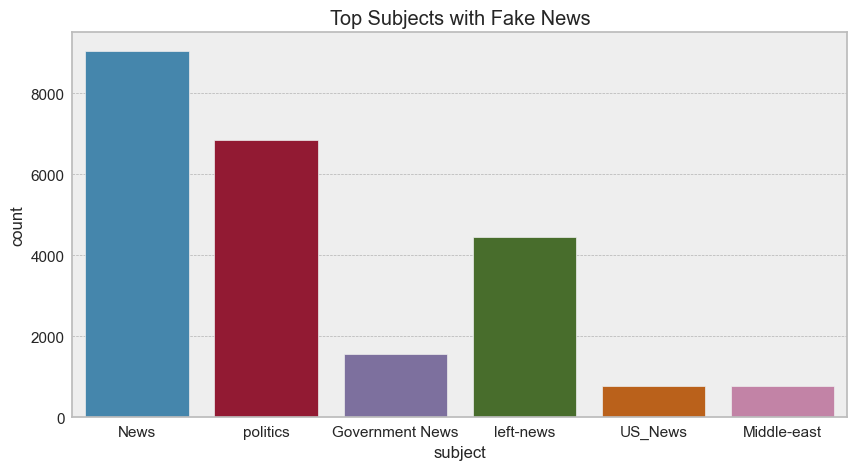

In [100]:
plt.figure(figsize=(10,5))  
sns.countplot("subject", data=fake)
plt.title("Top Subjects with Fake News")
plt.show()

## The most repeated word in the fake news is (Trump) 

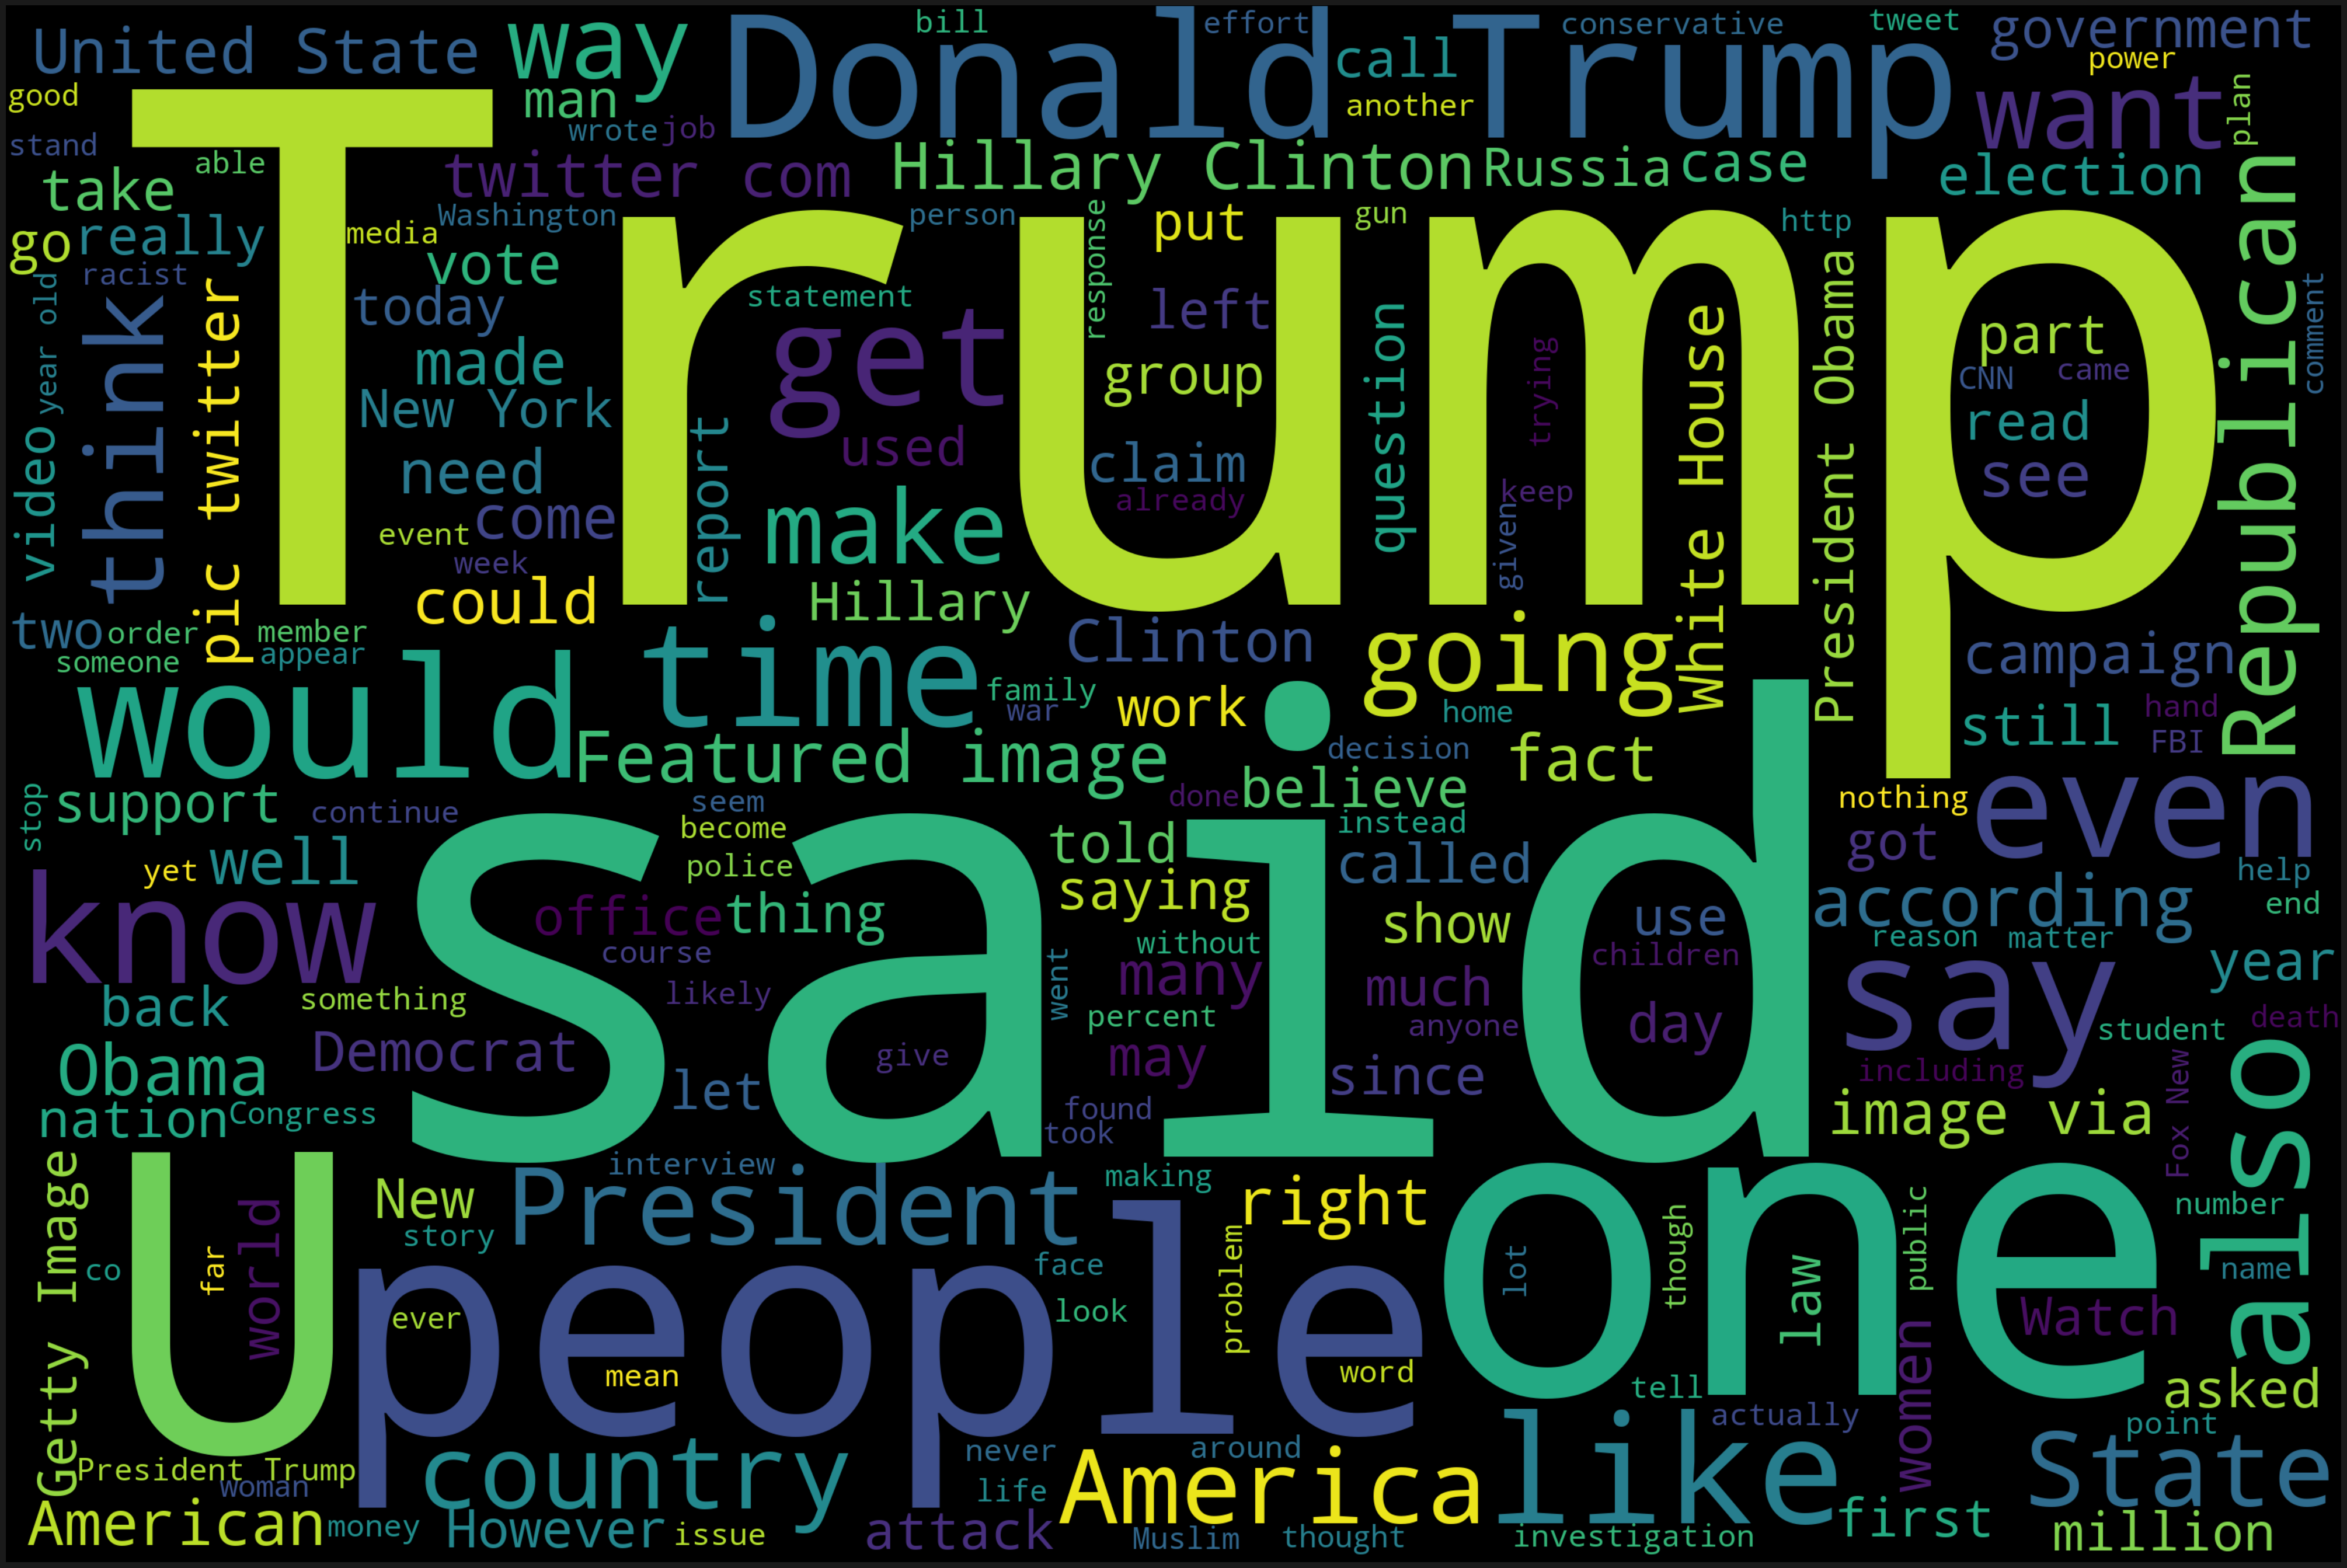

In [87]:
text = ''
for news in fake.text.values:
    text += f" {news}"
wordcloud = WordCloud(
    width = 3000,
    height = 2000,
    background_color = 'black',
    stopwords = set(nltk.corpus.stopwords.words("english"))).generate(text)
fig = plt.figure(
    figsize = (40, 30),
    facecolor = 'k',
    edgecolor = 'k')
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()
del text

## The most repeated word in the real news is (said) 

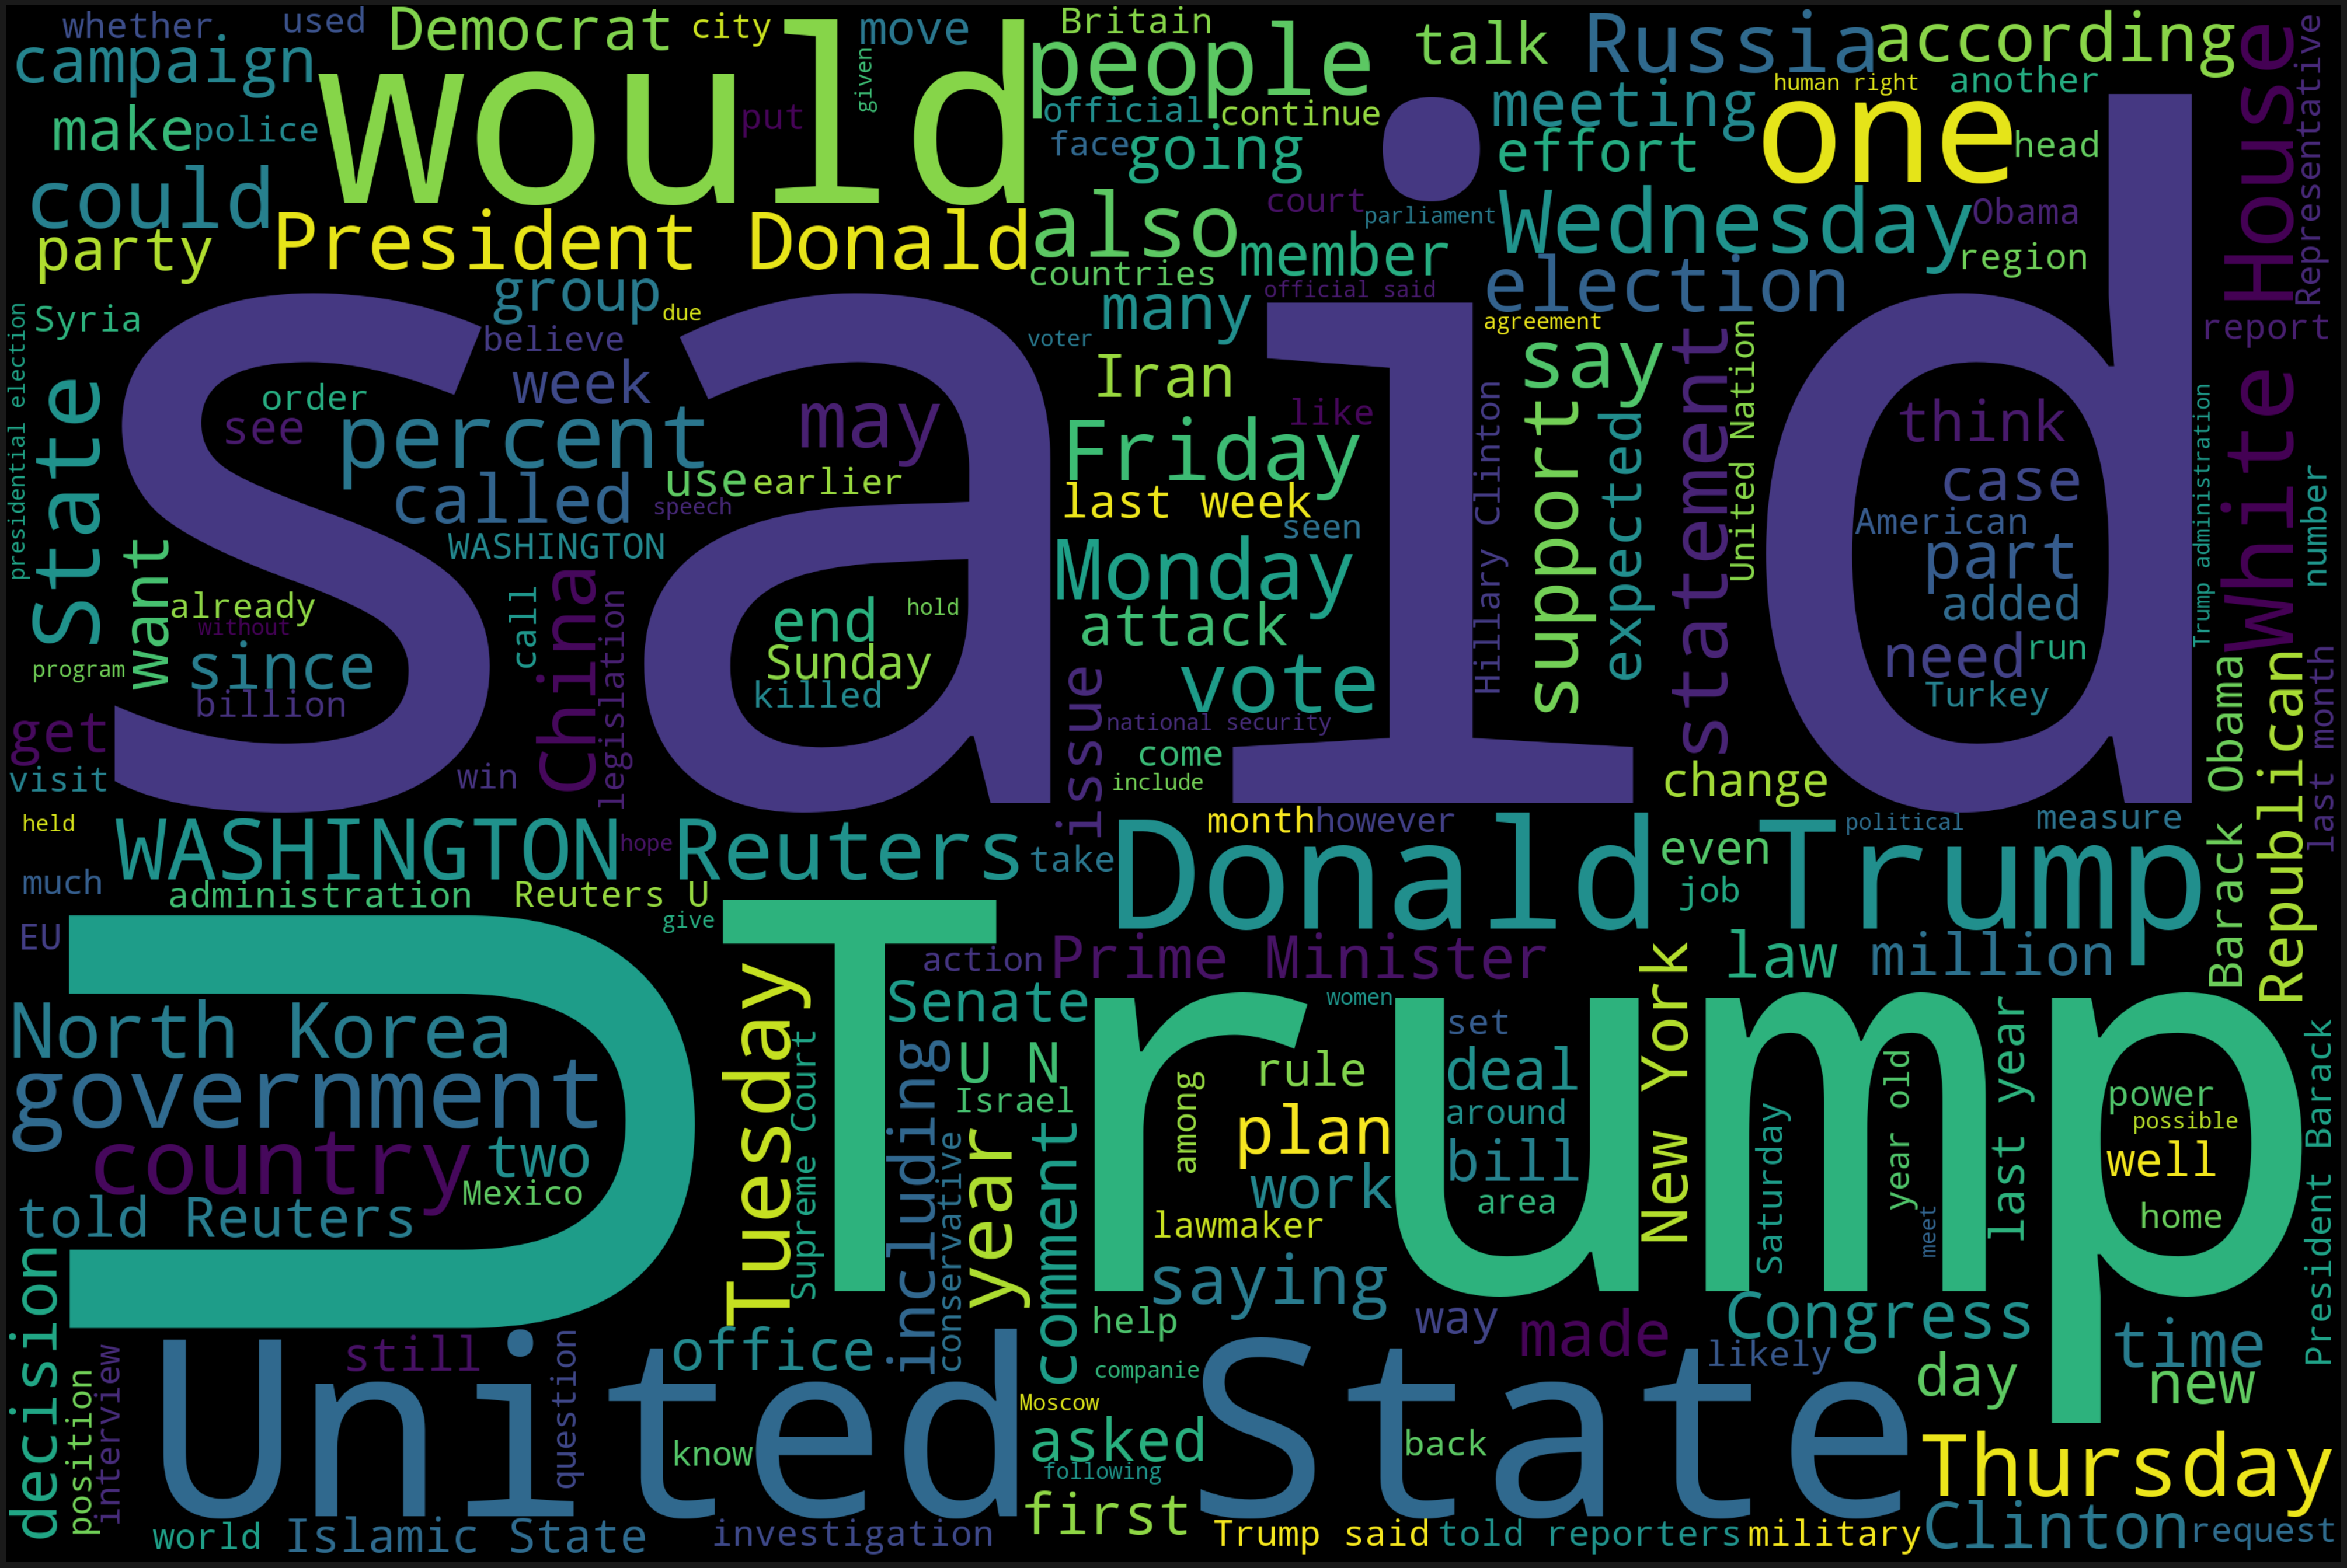

In [88]:
text = ''
for news in true.text.values:
    text += f" {news}"
wordcloud = WordCloud(
    width = 3000,
    height = 2000,
    background_color = 'black',
    stopwords = set(nltk.corpus.stopwords.words("english"))).generate(text)
fig = plt.figure(
    figsize = (40, 30),
    facecolor = 'k',
    edgecolor = 'k')
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()
del text

## Concatinating the fake news and real news

In [101]:
true['is_True'] = 1
fake['is_True'] = 0

news = pd.concat([true,fake]).reset_index(drop = True)
news

title  \
0      As U.S. budget fight looms, Republicans flip t...   
1      U.S. military to accept transgender recruits o...   
2      Senior U.S. Republican senator: 'Let Mr. Muell...   
3      FBI Russia probe helped by Australian diplomat...   
4      Trump wants Postal Service to charge 'much mor...   
...                                                  ...   
44893  McPain: John McCain Furious That Iran Treated ...   
44894  JUSTICE? Yahoo Settles E-mail Privacy Class-ac...   
44895  Sunnistan: US and Allied ‘Safe Zone’ Plan to T...   
44896  How to Blow $700 Million: Al Jazeera America F...   
44897  10 U.S. Navy Sailors Held by Iranian Military ...   

                                                    text       subject  \
0      WASHINGTON (Reuters) - The head of a conservat...  politicsNews   
1      WASHINGTON (Reuters) - Transgender people will...  politicsNews   
2      WASHINGTON (Reuters) - The special counsel inv...  politicsNews   
3      WASHINGTON (Reuters) - Trump campaign adviser ...  politicsNews   
4      SEATTLE/WASHINGTON (Reuters) - President Donal...  politicsNews   
...                                                  ...           ...   
44893  21st Century Wire says As 21WIRE reported earl...   Middle-east   
44894  21st Century Wire says It s a familiar theme. ...   Middle-east   
44895  Patrick Henningsen  21st Century WireRemember ...   Middle-east   
44896  21st Century Wire says Al Jazeera America will...   Middle-east   
44897  21st Century Wire says As 21WIRE predicted in ...   Middle-east   

                     date  is_True  
0      December 31, 2017         1  
1      December 29, 2017         1  
2      December 31, 2017         1  
3      December 30, 2017         1  
4      December 29, 2017         1  
...                   ...      ...  
44893    January 16, 2016        0  
44894    January 16, 2016        0  
44895    January 15, 2016        0  
44896    January 14, 2016        0  
44897    January 12, 2016        0  

[44898 rows x 5 columns]

In [102]:
news.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44898 entries, 0 to 44897
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    44898 non-null  object
 1   text     44898 non-null  object
 2   subject  44898 non-null  object
 3   date     44898 non-null  object
 4   is_True  44898 non-null  int64 
dtypes: int64(1), object(4)
memory usage: 1.7+ MB


## Dropping duplicate values

In [103]:
news.duplicated().sum()

209

In [104]:
news.drop_duplicates(inplace=True)

## Most of the whole news are about politics

In [105]:
news['subject'].value_counts()

politicsNews       11220
worldnews           9991
News                9050
politics            6838
left-news           4459
Government News     1570
US_News              783
Middle-east          778
Name: subject, dtype: int64

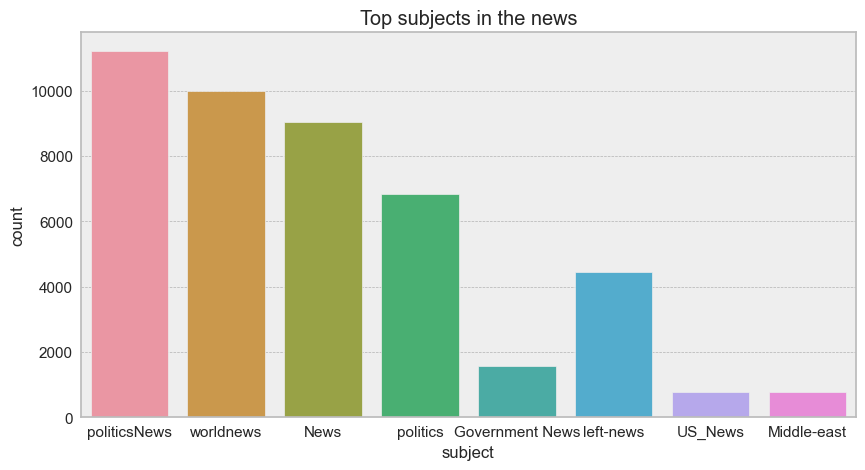

In [106]:
plt.style.use('seaborn-pastel')
plt.figure(figsize=(10,5))
plt.title("Top subjects in the news")
sns.countplot(x=news['subject']);

## The fake news are more than real ones but the dataset is nearly balanced (no bias)

In [107]:
news['is_True'].value_counts()

0    23478
1    21211
Name: is_True, dtype: int64

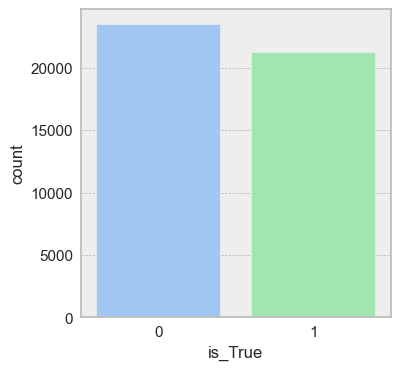

In [108]:
plt.style.use('seaborn-pastel')
plt.figure(figsize=(4,4))
sns.countplot(x=news['is_True']);

In [109]:
news['date'] = pd.to_datetime(news['date'], errors='coerce')
news['Year'] = news['date'].dt.year
news['Month'] = news['date'].dt.month
news

title  \
0      As U.S. budget fight looms, Republicans flip t...   
1      U.S. military to accept transgender recruits o...   
2      Senior U.S. Republican senator: 'Let Mr. Muell...   
3      FBI Russia probe helped by Australian diplomat...   
4      Trump wants Postal Service to charge 'much mor...   
...                                                  ...   
44893  McPain: John McCain Furious That Iran Treated ...   
44894  JUSTICE? Yahoo Settles E-mail Privacy Class-ac...   
44895  Sunnistan: US and Allied ‘Safe Zone’ Plan to T...   
44896  How to Blow $700 Million: Al Jazeera America F...   
44897  10 U.S. Navy Sailors Held by Iranian Military ...   

                                                    text       subject  \
0      WASHINGTON (Reuters) - The head of a conservat...  politicsNews   
1      WASHINGTON (Reuters) - Transgender people will...  politicsNews   
2      WASHINGTON (Reuters) - The special counsel inv...  politicsNews   
3      WASHINGTON (Reuters) - Trump campaign adviser ...  politicsNews   
4      SEATTLE/WASHINGTON (Reuters) - President Donal...  politicsNews   
...                                                  ...           ...   
44893  21st Century Wire says As 21WIRE reported earl...   Middle-east   
44894  21st Century Wire says It s a familiar theme. ...   Middle-east   
44895  Patrick Henningsen  21st Century WireRemember ...   Middle-east   
44896  21st Century Wire says Al Jazeera America will...   Middle-east   
44897  21st Century Wire says As 21WIRE predicted in ...   Middle-east   

            date  is_True    Year  Month  
0     2017-12-31        1  2017.0   12.0  
1     2017-12-29        1  2017.0   12.0  
2     2017-12-31        1  2017.0   12.0  
3     2017-12-30        1  2017.0   12.0  
4     2017-12-29        1  2017.0   12.0  
...          ...      ...     ...    ...  
44893 2016-01-16        0  2016.0    1.0  
44894 2016-01-16        0  2016.0    1.0  
44895 2016-01-15        0  2016.0    1.0  
44896 2016-01-14        0  2016.0    1.0  
44897 2016-01-12        0  2016.0    1.0  

[44689 rows x 7 columns]

## Most of the fake news were published in 2016 while most of true ones were in 2017

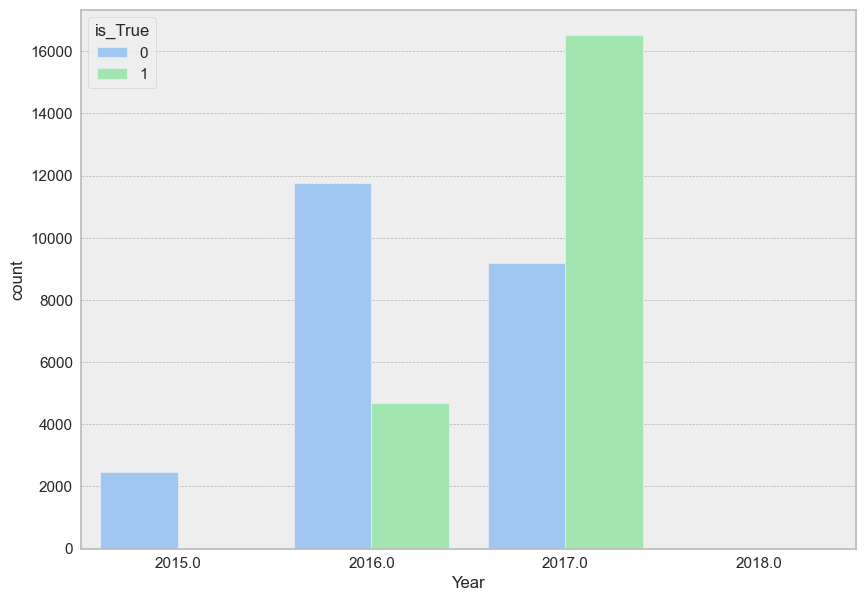

In [110]:
plt.style.use('seaborn-pastel')
plt.figure(figsize=(10, 7))
sns.countplot(data=news, x='Year', hue='is_True');

## True news seem to increase in the last quarter of the year while fake news are nearly equal through the year

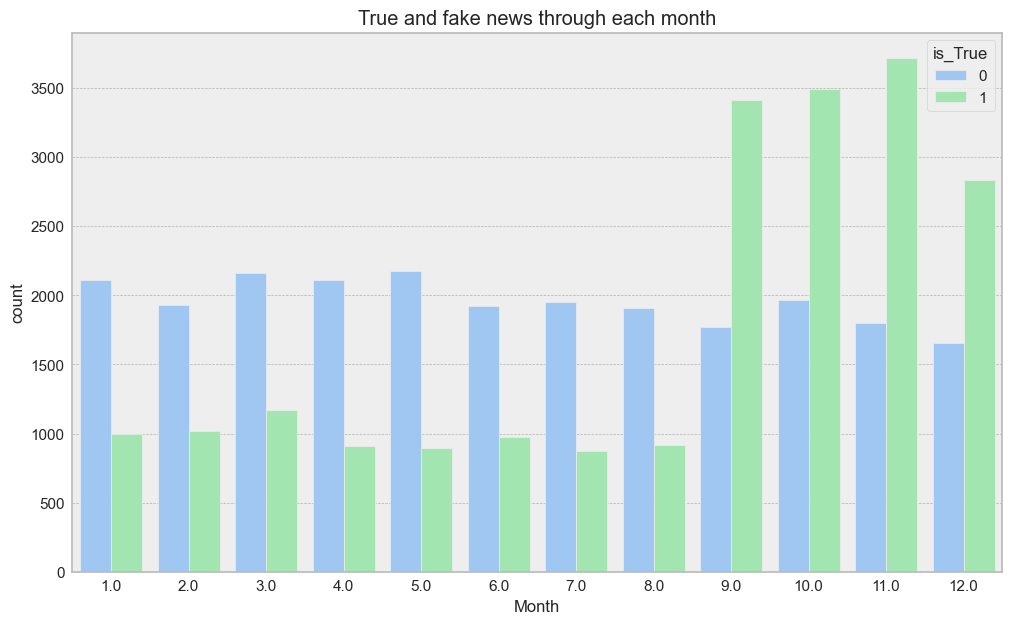

In [111]:
plt.style.use('seaborn-pastel')
plt.figure(figsize=(12, 7))
plt.title("True and fake news through each month")
sns.countplot(data=news, x='Month', hue='is_True');

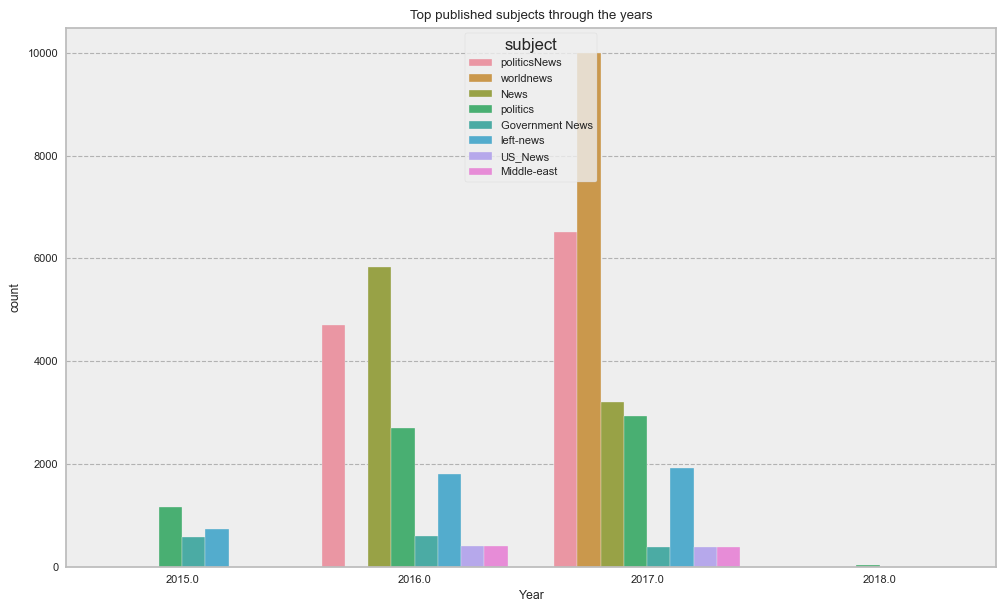

In [112]:
plt.style.use('seaborn-paper')
plt.figure(figsize=(12, 7))
plt.title("Top published subjects through the years")
sns.countplot(data=news, x='Year', hue='subject');

In [113]:
news['title'] = news['title'] + ' ' + news['text']
news

title  \
0      As U.S. budget fight looms, Republicans flip t...   
1      U.S. military to accept transgender recruits o...   
2      Senior U.S. Republican senator: 'Let Mr. Muell...   
3      FBI Russia probe helped by Australian diplomat...   
4      Trump wants Postal Service to charge 'much mor...   
...                                                  ...   
44893  McPain: John McCain Furious That Iran Treated ...   
44894  JUSTICE? Yahoo Settles E-mail Privacy Class-ac...   
44895  Sunnistan: US and Allied ‘Safe Zone’ Plan to T...   
44896  How to Blow $700 Million: Al Jazeera America F...   
44897  10 U.S. Navy Sailors Held by Iranian Military ...   

                                                    text       subject  \
0      WASHINGTON (Reuters) - The head of a conservat...  politicsNews   
1      WASHINGTON (Reuters) - Transgender people will...  politicsNews   
2      WASHINGTON (Reuters) - The special counsel inv...  politicsNews   
3      WASHINGTON (Reuters) - Trump campaign adviser ...  politicsNews   
4      SEATTLE/WASHINGTON (Reuters) - President Donal...  politicsNews   
...                                                  ...           ...   
44893  21st Century Wire says As 21WIRE reported earl...   Middle-east   
44894  21st Century Wire says It s a familiar theme. ...   Middle-east   
44895  Patrick Henningsen  21st Century WireRemember ...   Middle-east   
44896  21st Century Wire says Al Jazeera America will...   Middle-east   
44897  21st Century Wire says As 21WIRE predicted in ...   Middle-east   

            date  is_True    Year  Month  
0     2017-12-31        1  2017.0   12.0  
1     2017-12-29        1  2017.0   12.0  
2     2017-12-31        1  2017.0   12.0  
3     2017-12-30        1  2017.0   12.0  
4     2017-12-29        1  2017.0   12.0  
...          ...      ...     ...    ...  
44893 2016-01-16        0  2016.0    1.0  
44894 2016-01-16        0  2016.0    1.0  
44895 2016-01-15        0  2016.0    1.0  
44896 2016-01-14        0  2016.0    1.0  
44897 2016-01-12        0  2016.0    1.0  

[44689 rows x 7 columns]

In [115]:
news

title  \
0      As U.S. budget fight looms, Republicans flip t...   
1      U.S. military to accept transgender recruits o...   
2      Senior U.S. Republican senator: 'Let Mr. Muell...   
3      FBI Russia probe helped by Australian diplomat...   
4      Trump wants Postal Service to charge 'much mor...   
...                                                  ...   
44893  McPain: John McCain Furious That Iran Treated ...   
44894  JUSTICE? Yahoo Settles E-mail Privacy Class-ac...   
44895  Sunnistan: US and Allied ‘Safe Zone’ Plan to T...   
44896  How to Blow $700 Million: Al Jazeera America F...   
44897  10 U.S. Navy Sailors Held by Iranian Military ...   

                                                    text       subject  \
0      WASHINGTON (Reuters) - The head of a conservat...  politicsNews   
1      WASHINGTON (Reuters) - Transgender people will...  politicsNews   
2      WASHINGTON (Reuters) - The special counsel inv...  politicsNews   
3      WASHINGTON (Reuters) - Trump campaign adviser ...  politicsNews   
4      SEATTLE/WASHINGTON (Reuters) - President Donal...  politicsNews   
...                                                  ...           ...   
44893  21st Century Wire says As 21WIRE reported earl...   Middle-east   
44894  21st Century Wire says It s a familiar theme. ...   Middle-east   
44895  Patrick Henningsen  21st Century WireRemember ...   Middle-east   
44896  21st Century Wire says Al Jazeera America will...   Middle-east   
44897  21st Century Wire says As 21WIRE predicted in ...   Middle-east   

            date  is_True    Year  Month  
0     2017-12-31        1  2017.0   12.0  
1     2017-12-29        1  2017.0   12.0  
2     2017-12-31        1  2017.0   12.0  
3     2017-12-30        1  2017.0   12.0  
4     2017-12-29        1  2017.0   12.0  
...          ...      ...     ...    ...  
44893 2016-01-16        0  2016.0    1.0  
44894 2016-01-16        0  2016.0    1.0  
44895 2016-01-15        0  2016.0    1.0  
44896 2016-01-14        0  2016.0    1.0  
44897 2016-01-12        0  2016.0    1.0  

[44689 rows x 7 columns]

In [116]:
import re
def clean_data(x):
    text = x
    text = text.lower()
    text = re.sub('\[.*?\]', '', text) # remove square brackets
    text = re.sub(r'[^\w\s]','',text) # remove punctuation
    text = re.sub('\w*\d\w*', '', text) # remove words containing numbers
    text = re.sub(r'http\S+', '', text)
    text = re.sub('\n', '', text)
    return text

In [117]:
clean_news = news.copy()
clean_news['title'] = news.title.apply(lambda x : clean_data(x))
clean_news.head()

title  \
0  as us budget fight looms republicans flip thei...   
1  us military to accept transgender recruits on ...   
2  senior us republican senator let mr mueller do...   
3  fbi russia probe helped by australian diplomat...   
4  trump wants postal service to charge much more...   

                                                text       subject       date  \
0  WASHINGTON (Reuters) - The head of a conservat...  politicsNews 2017-12-31   
1  WASHINGTON (Reuters) - Transgender people will...  politicsNews 2017-12-29   
2  WASHINGTON (Reuters) - The special counsel inv...  politicsNews 2017-12-31   
3  WASHINGTON (Reuters) - Trump campaign adviser ...  politicsNews 2017-12-30   
4  SEATTLE/WASHINGTON (Reuters) - President Donal...  politicsNews 2017-12-29   

   is_True    Year  Month  
0        1  2017.0   12.0  
1        1  2017.0   12.0  
2        1  2017.0   12.0  
3        1  2017.0   12.0  
4        1  2017.0   12.0

In [118]:
import nltk
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
stop_words.extend(['use', 're', 'edu', 'from', 'also'])
def remove_eng_stopwords(text):
    token_text = nltk.word_tokenize(text)
    remove_stop = [word for word in token_text if word not in stop_words]
    join_text = ' '.join(remove_stop)
    return join_text

In [119]:
clean_news['title'] = clean_news.title.apply(lambda x : remove_eng_stopwords(x))

In [120]:
clean_news

title  \
0      us budget fight looms republicans flip fiscal ...   
1      us military accept transgender recruits monday...   
2      senior us republican senator let mr mueller jo...   
3      fbi russia probe helped australian diplomat ti...   
4      trump wants postal service charge much amazon ...   
...                                                  ...   
44893  mcpain john mccain furious iran treated us sai...   
44894  justice yahoo settles email privacy classactio...   
44895  sunnistan us allied safe zone plan take territ...   
44896  blow million al jazeera america finally calls ...   
44897  us navy sailors held iranian military signs ne...   

                                                    text       subject  \
0      WASHINGTON (Reuters) - The head of a conservat...  politicsNews   
1      WASHINGTON (Reuters) - Transgender people will...  politicsNews   
2      WASHINGTON (Reuters) - The special counsel inv...  politicsNews   
3      WASHINGTON (Reuters) - Trump campaign adviser ...  politicsNews   
4      SEATTLE/WASHINGTON (Reuters) - President Donal...  politicsNews   
...                                                  ...           ...   
44893  21st Century Wire says As 21WIRE reported earl...   Middle-east   
44894  21st Century Wire says It s a familiar theme. ...   Middle-east   
44895  Patrick Henningsen  21st Century WireRemember ...   Middle-east   
44896  21st Century Wire says Al Jazeera America will...   Middle-east   
44897  21st Century Wire says As 21WIRE predicted in ...   Middle-east   

            date  is_True    Year  Month  
0     2017-12-31        1  2017.0   12.0  
1     2017-12-29        1  2017.0   12.0  
2     2017-12-31        1  2017.0   12.0  
3     2017-12-30        1  2017.0   12.0  
4     2017-12-29        1  2017.0   12.0  
...          ...      ...     ...    ...  
44893 2016-01-16        0  2016.0    1.0  
44894 2016-01-16        0  2016.0    1.0  
44895 2016-01-15        0  2016.0    1.0  
44896 2016-01-14        0  2016.0    1.0  
44897 2016-01-12        0  2016.0    1.0  

[44689 rows x 7 columns]

In [121]:
from itertools import chain
from collections import Counter
list_words = clean_news['title'].str.split()
list_words_merge = list(chain(*list_words))

d = Counter(list_words_merge)
df = pd.DataFrame(data=d, index=['count'])
top_common_words = df.T.sort_values(by=['count'], ascending=False).reset_index().head(50)
top_common_words.head()

index   count
0       said  129059
1      trump  127295
2         us   67659
3      would   55051
4  president   52257

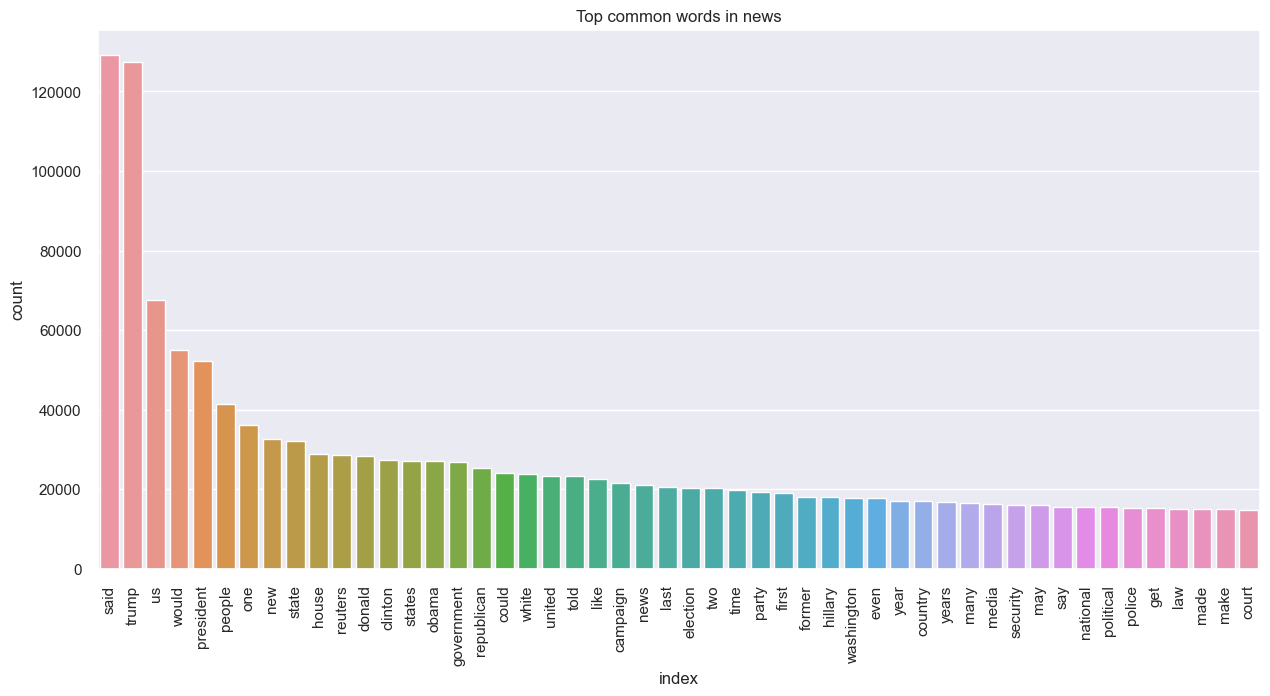

In [122]:
plt.figure(figsize=(15,7))
sns.set(style="darkgrid")
sns.barplot(x="index", y='count', data=top_common_words)
plt.title("Top common words in news")
plt.xticks(rotation=90);

In [123]:
string = ' '.join(clean_news['title'])
str_val = string.split(" ")
data_unigram=(pd.Series(nltk.ngrams(str_val, 1)).value_counts())[:30]
data_unigram_df=pd.DataFrame(data_unigram)
data_unigram_df = data_unigram_df.reset_index()
data_unigram_df = data_unigram_df.rename(columns={"index": "key", 0: "value"})
data_unigram_df.head()

key   value
0       (said,)  129059
1      (trump,)  127295
2         (us,)   67659
3      (would,)   55051
4  (president,)   52257

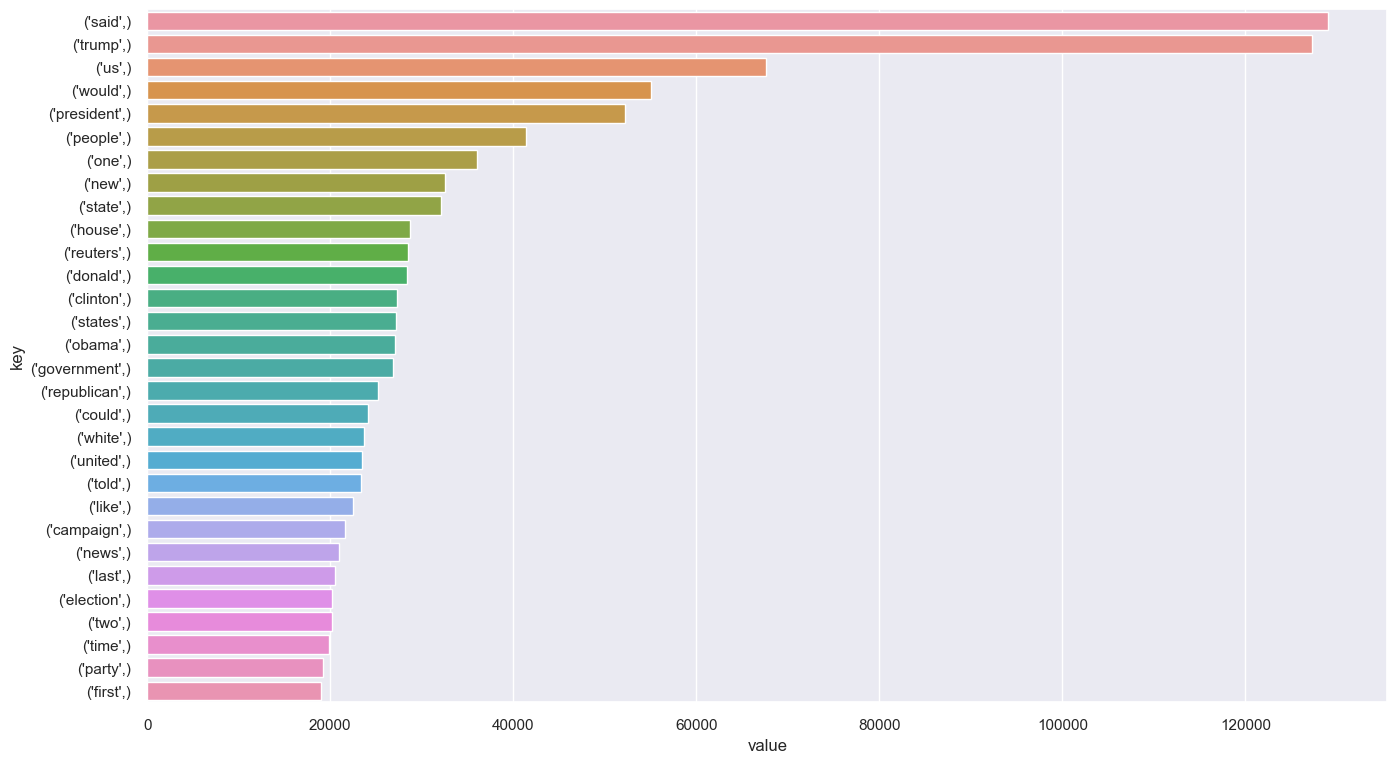

In [124]:
plt.figure(figsize = (16,9))
sns.barplot(x='value',y='key', data=data_unigram_df);

In [125]:
data_bigram=(pd.Series(nltk.ngrams(str_val, 2)).value_counts())[:30]
data_bigram_df=pd.DataFrame(data_bigram)
data_bigram_df = data_bigram_df.reset_index()
data_bigram_df = data_bigram_df.rename(columns={"index": "key", 0: "value"})
data_bigram_df.head()

key  value
0     (donald, trump)  21724
1    (united, states)  18224
2      (white, house)  15585
3  (hillary, clinton)   9216
4         (new, york)   8687

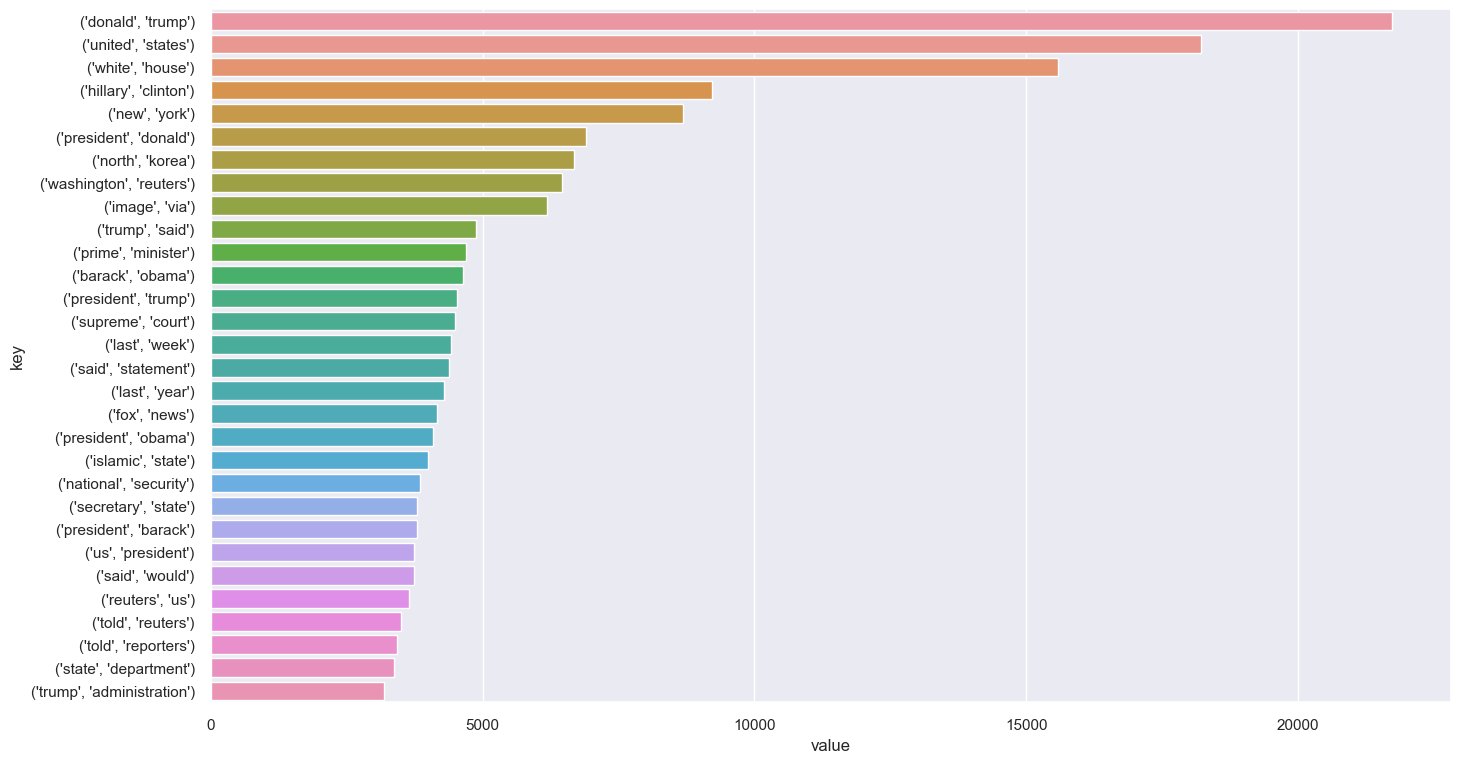

In [126]:
plt.figure(figsize = (16,9))
sns.barplot(x='value',y='key', data=data_bigram_df);

In [127]:
data_trigram=(pd.Series(nltk.ngrams(str_val, 3)).value_counts())[:30]
data_trigram_df=pd.DataFrame(data_trigram)
data_trigram_df = data_trigram_df.reset_index()
data_trigram_df = data_trigram_df.rename(columns={"index": "key", 0: "value"})
data_trigram_df.head()

key  value
0  (president, donald, trump)   5285
1  (president, barack, obama)   2843
2     (us, president, donald)   2555
3   (washington, reuters, us)   2347
4          (donald, j, trump)   2159

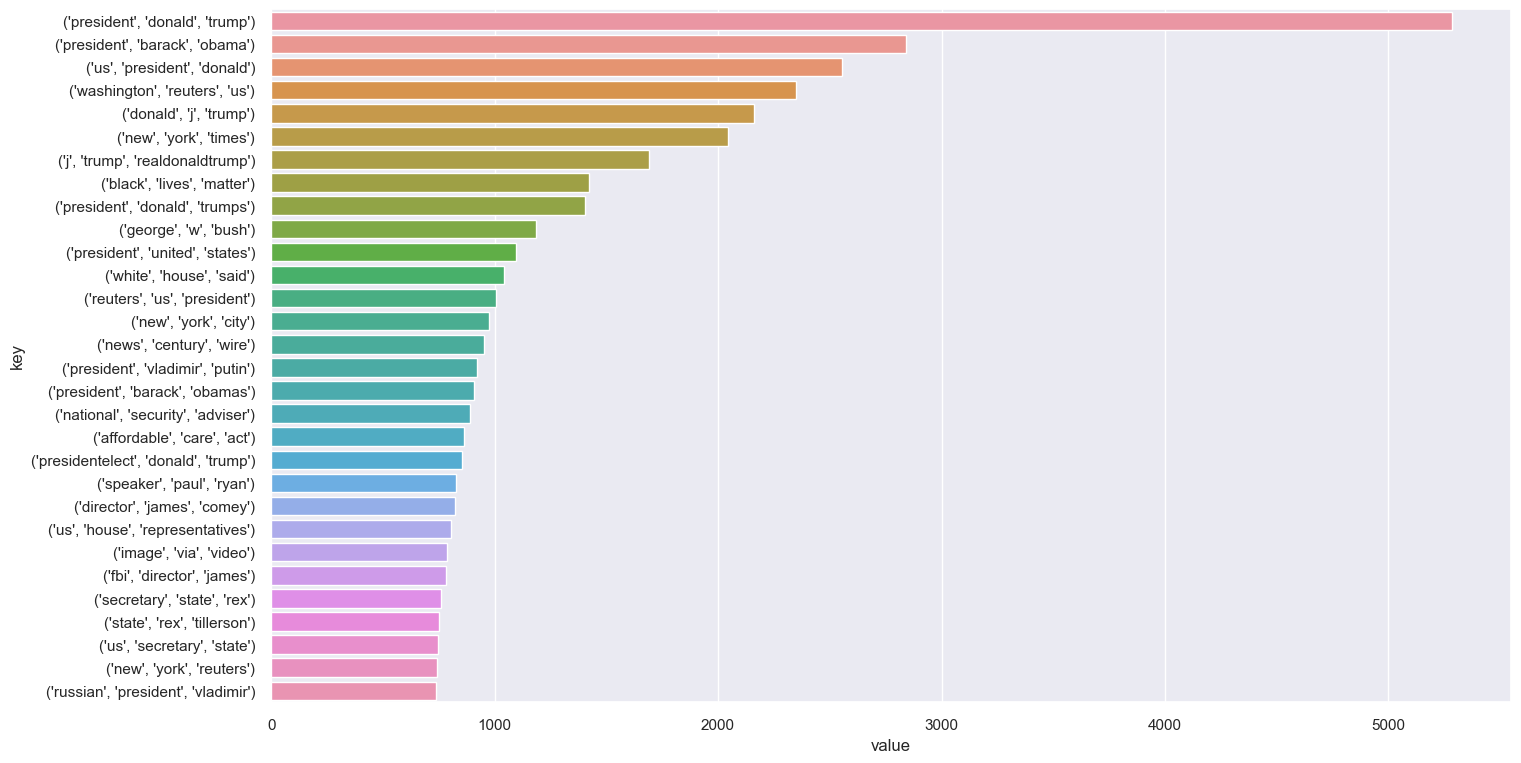

In [128]:
plt.figure(figsize = (16,9))
sns.barplot(x='value',y='key', data=data_trigram_df);

In [129]:
model_data = news.copy()
model_data['combine_text'] = model_data['subject'] + " " + model_data['title'] + " " + model_data['text']
del model_data['title']
del model_data['subject']
del model_data['date']
del model_data['text']
del model_data['Year']
del model_data['Month']
model_data.head()

is_True                                       combine_text
0        1  politicsNews As U.S. budget fight looms, Repub...
1        1  politicsNews U.S. military to accept transgend...
2        1  politicsNews Senior U.S. Republican senator: '...
3        1  politicsNews FBI Russia probe helped by Austra...
4        1  politicsNews Trump wants Postal Service to cha...

In [130]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(model_data['combine_text'], model_data['is_True'], random_state=0)

In [131]:
from sklearn.feature_extraction.text import CountVectorizer
vec_train = CountVectorizer().fit(X_train)
X_vec_train = vec_train.transform(X_train)
X_vec_test = vec_train.transform(X_test)
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score
model = LogisticRegression()
model.fit(X_vec_train, y_train)
predicted_value = model.predict(X_vec_test)
accuracy_value = roc_auc_score(y_test, predicted_value)
print(accuracy_value)

0.9964015900485116


In [132]:
from sklearn.metrics import confusion_matrix,classification_report
print(classification_report(y_test, predicted_value))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      5870
           1       1.00      1.00      1.00      5303

    accuracy                           1.00     11173
   macro avg       1.00      1.00      1.00     11173
weighted avg       1.00      1.00      1.00     11173



In [133]:
cm=confusion_matrix(y_test,predicted_value)

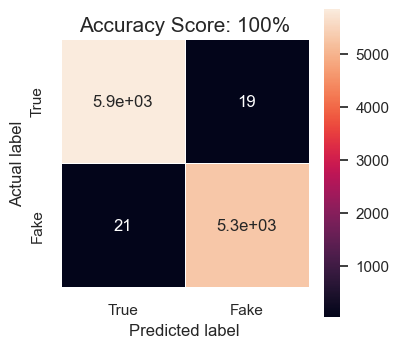

In [134]:
plt.figure(figsize=(4,4))
sns.heatmap(cm, annot=True, linewidths=.5, square = True,xticklabels=['True','Fake'] ,yticklabels=['True','Fake']);
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = "Accuracy Score: {:.0%}".format(accuracy_value)
plt.title(all_sample_title, size = 15);
ax=plt.subplot

In [135]:
clean_news.to_csv("news.csv")